In [38]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

Ley de enfriamiento de Newton
$$\begin{cases}
\frac{dT}{dt}(t)=-k\left(T(t)-T_{a}\right)\\
T(0)=T_{0}
\end{cases}$$

In [6]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode,0)

Eq(k*(-T_a + T(t)) + Derivative(T(t), t), 0)

In [10]:
ode_sol = sympy.dsolve(ode)
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [13]:
ode_sol.rhs

C1*exp(-k*t) + T_a

In [15]:
def apply_ics(sol, ics, x, known_params):
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [17]:
ics = {T(0): T0}
apply_ics(ode_sol, ics, t, [k, Ta])

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

Ocilador armónico amortiguado
$$\frac{d^{2}x}{dt^{2}}(t)+2\gamma\omega_{0}\frac{dx}{dt}(t)+\omega_{0}^{2}x(t)=0$$

In [23]:
t, omega0, gamma= sympy.symbols("t, omega_0, gamma",positive=True)
x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
ode

2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2))

In [25]:
sympy.Eq(ode,0)

Eq(2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [27]:
ode_sol = sympy.dsolve(ode)
ode_sol 

Eq(x(t), C1*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))) + C2*exp(-omega_0*t*(gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [31]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

Eq(x(t), (-gamma/(2*sqrt(gamma - 1)*sqrt(gamma + 1)) + 1/2)*exp(-omega_0*t*(gamma + sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma - 1)*sqrt(gamma + 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [33]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

(omega_0*t + 1)*exp(-omega_0*t)

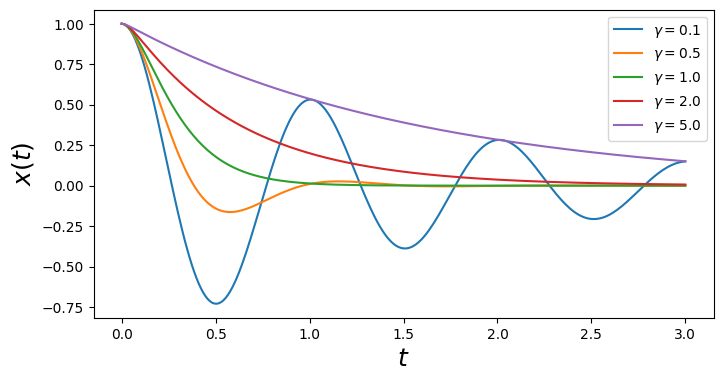

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')

    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()



